# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [4]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [3]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': 'Дворник',
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [24]:
data

{'items': [{'id': '98611067',
   'premium': False,
   'name': 'Горничная приходящая',
   'department': None,
   'has_test': False,
   'response_letter_required': False,
   'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
   'salary': {'from': 150000, 'to': 150000, 'currency': 'RUR', 'gross': False},
   'type': {'id': 'open', 'name': 'Открытая'},
   'address': {'city': 'Москва',
    'street': 'Славянский бульвар',
    'building': None,
    'lat': 55.727161,
    'lng': 37.469871,
    'description': None,
    'raw': 'Москва, Славянский бульвар',
    'metro': {'station_name': 'Славянский бульвар',
     'line_name': 'Арбатско-Покровская',
     'station_id': '3.176',
     'line_id': '3',
     'lat': 55.729542,
     'lng': 37.470973},
    'metro_stations': [{'station_name': 'Славянский бульвар',
      'line_name': 'Арбатско-Покровская',
      'station_id': '3.176',
      'line_id': '3',
      'lat': 55.729542,
      'lng': 37.470973}],
    'id': '14141014'},
   'resp

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [2]:
URL = 'https://api.hh.ru/vacancies'
jobs = ['Астроном',
        'Филолог',
        'Биотехнолог',
        'Адвокат',
        'Ветеринар']
params = {'area': 1,
          'page': 0,
          'per_page': 100}
result = []
for job in jobs:
    params['text'] = job
    data = requests.get(URL, params).json()
    result.append(data)
    sleep(1)
    print(f"Найдено {data['found']} вакансий для профессии {job}")

Найдено 3 вакансий для профессии Астроном
Найдено 260 вакансий для профессии Филолог
Найдено 191 вакансий для профессии Биотехнолог
Найдено 207 вакансий для профессии Адвокат
Найдено 618 вакансий для профессии Ветеринар


(1 балл) Посчитайте сколько всего найдено вакансий:

In [3]:
ans = 0
for data in result:
    ans += data['found']
print(f'Всего найдено {ans} вакансий')

Всего найдено 1279 вакансий


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [4]:
class Company:
    def __init__(self, name, lat, lng):
      self.name = name
      self.lat = lat
      self.lng = lng
        
    def __eq__(self, other):
      return self.name == other.name and self.lat == other.lat and self.lng == other.lng

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [5]:
companies = []
coordinates = []
for i,data in enumerate(result):
    job_companies = []
    job_coordinates = []
    for page in range(data['pages']):
        sleep(1)
        params = {'text': jobs[i],
                  'area': 1,
                  'page': page,
                  'per_page': 100}
        page_data = requests.get(URL, params).json()

        for item in page_data['items']:
            curr_coords = [item['address']['lat'],item['address']['lng']] if item['address'] else [None, None];
            new_company = Company(item['employer']['name'], curr_coords[0], curr_coords[1])
            if new_company not in job_companies:
                job_companies.append(new_company)
            job_coordinates.append(curr_coords)
    companies.append(job_companies)
    coordinates.append(job_coordinates)
    print(f'Найдено {len(job_companies)} компаний для профессии {jobs[i]}')

Найдено 1 компаний для профессии Астроном
Найдено 209 компаний для профессии Филолог
Найдено 122 компаний для профессии Биотехнолог
Найдено 156 компаний для профессии Адвокат
Найдено 417 компаний для профессии Ветеринар


(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [6]:
offers_with_coords = 0
for job in coordinates:
    for coords in job:
        if coords[0]:
            offers_with_coords += 1
print(f'{offers_with_coords} вакансий, у которых заданы координаты')

973 вакансий, у которых заданы координаты


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [43]:
offers_in_mrar = []
left = 37.48
right = 37.8431
down = 55.6
up = 55.89
ans = 0
for job in coordinates:
    job_offers = []
    for coords in job:
        if coords[0] and down <= coords[0] <= up and left <= coords[1] <= right:
            job_offers.append(coords)
            ans += 1
    offers_in_mrar.append(job_offers)
print(f'{ans} вакансий внутри МКАД')

734 вакансий внутри МКАД


(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

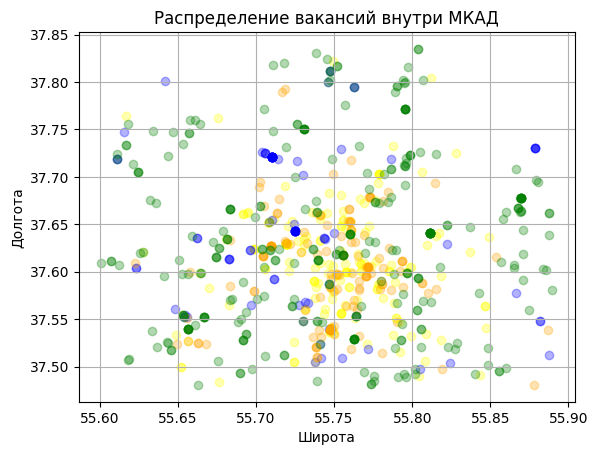

In [44]:
colors = ['red', 'yellow', 'blue', 'orange', 'green']
lon = []
lat = []
for i, job in enumerate(offers_in_mrar):
    x = []
    y = []
    for coords in job:
        x.append(coords[0])
        y.append(coords[1])
    plt.title('Распределение вакансий внутри МКАД')
    plt.xlabel('Широта')
    plt.ylabel('Долгота')
    plt.grid()
    plt.scatter(x, y, c=colors[i], alpha=0.3)
    lon.append(y) 
    lat.append(x) 
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

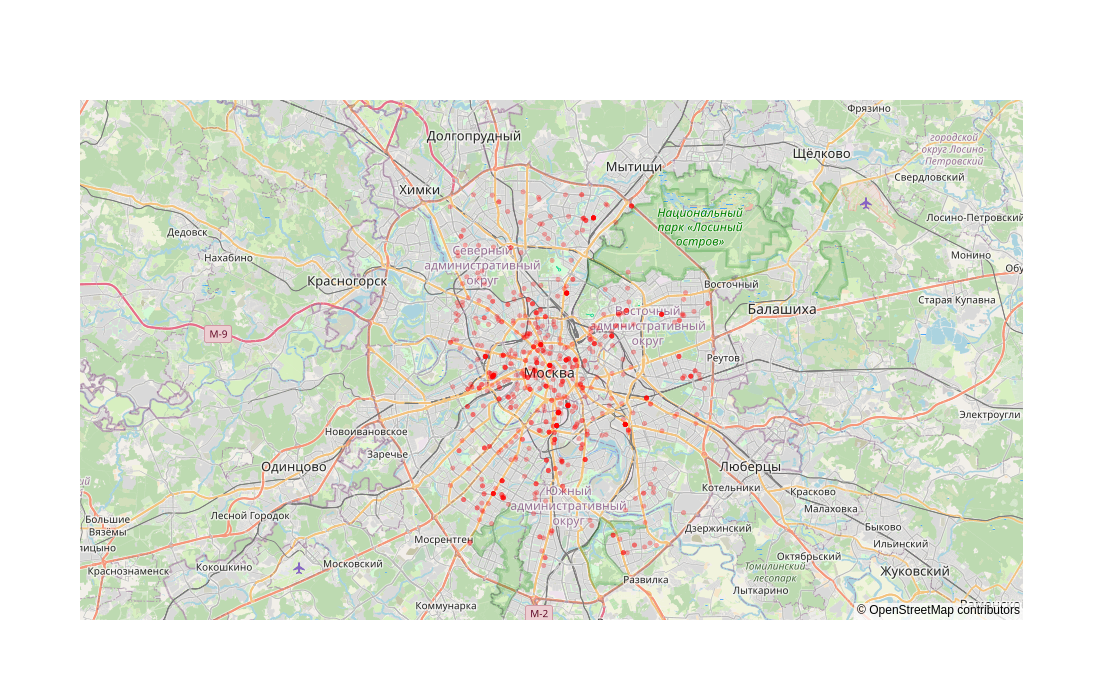

In [54]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

fig = go.Figure(go.Scattermapbox(lat=lat, lon=lon, marker=dict(color='rgba(255,0,0,0.3)')))
map_center = go.layout.mapbox.Center(lat=55.76, lon=37.62)
fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center, zoom=9), height=700, width=1000)
fig.show()

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Ваши выводы здесь :)

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию о бриллиантах, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [2]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /home/ton/Загрузки/diamonds.csv
100%|██████████████████████████████████████| 35.4M/35.4M [00:08<00:00, 4.18MB/s]


Создадим DataFrame:

In [5]:
diamonds = pd.read_csv('diamonds.csv')

(0.5 балла) Выведете первые 5 строк датасета:

In [5]:
diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [6]:
diamonds.shape[0]

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [7]:
min_cost = diamonds['total_sales_price'].min()
max_cost = diamonds['total_sales_price'].max()
for i, row in diamonds.iterrows():
    if row['total_sales_price'] == min_cost:
        print(f'{i} - {min_cost}')
        break
for i, row in diamonds.iterrows():
    if row['total_sales_price'] == max_cost:
        print(f'{i} - {max_cost}')
        break

0 - 200
219702 - 1449881


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [8]:
ans = 0
columns_with_none = set()
for i, row in diamonds.iterrows():
    for column in diamonds.columns.values:
        if row[column] == 'unknown' or row[column] is None:
            ans += 1
            columns_with_none.add(column)
print(ans)

1746027


(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [9]:
for column in columns_with_none:
    print(column)

eye_clean
fancy_color_secondary_color
girdle_min
girdle_max
fluor_intensity
color
cut_quality
culet_condition
fancy_color_intensity
culet_size
fancy_color_dominant_color
fluor_color
fancy_color_overtone


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [10]:
ans = 0
useless_cols = []
for column in diamonds.columns.values:
    if column.startswith("fancy_color_") or column.startswith("fluor_"):
        ans += 1
        useless_cols.append(column)
print(ans)

6


2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [11]:
ans = 0
for i, row in diamonds.iterrows():
    for column in useless_cols:
        if row[column] != 'unknown' and row[column] is not None:
            ans += 1
print(ans)

256727


3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [12]:
diamonds = diamonds.drop(columns = useless_cols)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [13]:
ans = 0
useless_cols = []
for column in diamonds.columns.values:
    if column.startswith("culet_"):
        ans += 1
        useless_cols.append(column)
print(f'{ans} колонок')
ans = 0
for i, row in diamonds.iterrows():
    for column in useless_cols:
        if row[column] != 'unknown' and row[column] is not None:
            ans += 1
print(f'{ans} информативных ячеек')
diamonds = diamonds.drop(columns = useless_cols)

2 колонок
149282 информативных ячеек


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [14]:
print(diamonds["total_sales_price"].sum())

1517721991


Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [15]:
diamonds[diamonds['Unnamed: 0'] % 2 == 0]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219693,219694,Round,E,IF,12.52,Excellent,GIA,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219695,219696,Cushion Modified,unknown,VVS1,10.00,unknown,GIA,Very Good,Excellent,unknown,78.1,60.0,11.78,10.84,8.47,unknown,unknown,1124122
219697,219698,Oval,unknown,VS1,10.04,unknown,GIA,Excellent,Excellent,unknown,72.8,55.0,14.13,10.86,7.90,unknown,unknown,1161102
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500


(0.5 балла) А теперь с индексами, кратными 6:

In [16]:
diamonds[diamonds['Unnamed: 0'] % 6 == 0]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219677,219678,Round,G,VS1,10.14,Excellent,GIA,Excellent,Excellent,unknown,61.8,59.0,13.84,13.88,8.56,M,STK,851760
219683,219684,Pear,unknown,VS2,1.51,unknown,GIA,Very Good,Very Good,unknown,63.8,59.0,10.73,5.61,3.58,unknown,unknown,966401
219689,219690,Round,F,IF,10.66,Excellent,GIA,Excellent,Excellent,unknown,61.4,58.0,14.14,14.16,8.69,M,STK,1034844
219695,219696,Cushion Modified,unknown,VVS1,10.00,unknown,GIA,Very Good,Excellent,unknown,78.1,60.0,11.78,10.84,8.47,unknown,unknown,1124122


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [17]:
diamonds[["cut", "color", 'clarity', "cut_quality", 'lab', "symmetry", "polish", "eye_clean", "girdle_min", "girdle_max"]]

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот же столбец, только транспонированный, и выведите полученную матрицу:

In [20]:
array = np.array(diamonds["total_sales_price"])
array = array.reshape(1, array.size)
tarray = array.reshape(array.size, 1)
array @ tarray

array([[158540672665477]])

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

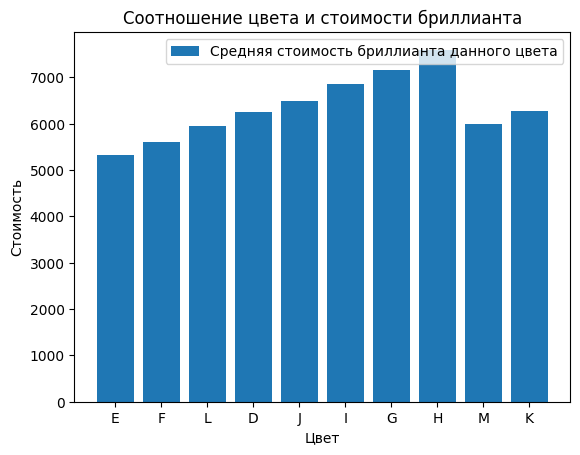

In [27]:
colors = {}
for i, row in diamonds.iterrows():
    if row['color'] != 'unknown' and row['color'] not in colors.keys() :
        colors[row['color']] = [1, row['total_sales_price']]
    elif row['color'] != 'unknown' :
        colors[row['color']][0] += 1
        colors[row['color']][1] += row['total_sales_price']
average_cost = []
for item in colors.values() :
    average_cost.append(item[1] / item[0])
plt.bar(colors.keys(), average_cost)
plt.title('Соотношение цвета и стоимости бриллианта')
plt.legend(['Средняя стоимость бриллианта данного цвета'])
plt.xlabel('Цвет')
plt.ylabel('Стоимость')
plt.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

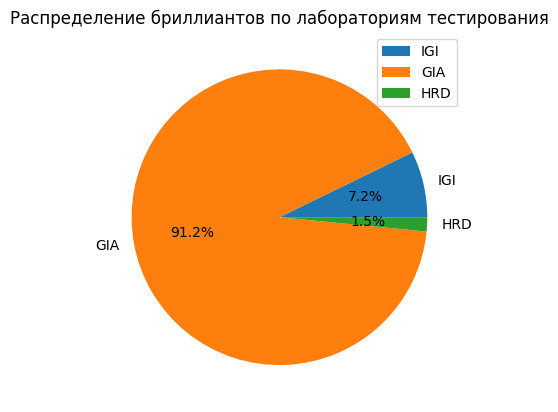

In [32]:
labs = {}
for i, row in diamonds.iterrows():
    if row['lab'] != 'unknown' and row['lab'] not in labs.keys() :
        labs[row['lab']] = 1
    elif row['lab'] != 'unknown' :
        labs[row['lab']] += 1
plt.pie(labs.values(), labels=labs.keys(), autopct='%1.1f%%')
plt.title('Распределение бриллиантов по лабораториям тестирования')
plt.legend()
plt.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

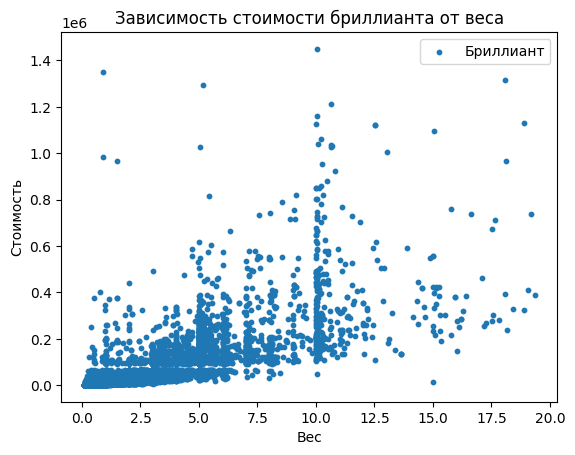

In [41]:
x=[]
y=[]
for i,row in diamonds.iterrows():
  x.append(row['carat_weight'])
  y.append(row['total_sales_price'])
plt.scatter(x, y, s=10)
plt.title('Зависимость стоимости бриллианта от веса')
plt.legend(['Бриллиант'])
plt.xlabel('Вес')
plt.ylabel('Стоимость')
plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

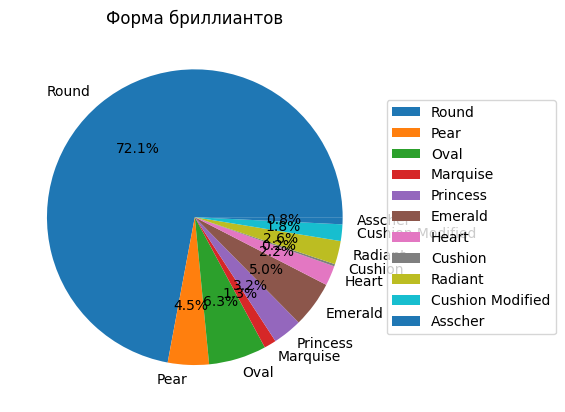

In [45]:
cuts = {}
for i, row in diamonds.iterrows():
    if row['cut'] != 'unknown' and row['cut'] not in cuts.keys() :
        cuts[row['cut']] = 1
    elif row['cut'] != 'unknown' :
        cuts[row['cut']] += 1
plt.pie(cuts.values(), labels=cuts.keys(), autopct='%1.1f%%')
plt.title('Форма бриллиантов')
plt.legend(loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Наиболее ценны бриллианты цвета 'H', наименее - 'E'
Подавляющее число бриллиантов оценивается в лаборатории GIA
Чаще всего встречаются бриллианты весом менюше десяти карат и стоимостью меньше 100000 долларов. В основном чем больше масса, тем больше стоимость бриллианта, но встречаются как небольшие и дорогие, так и большие и недорогие.
Почти 3/4 бриллиантов получают круглую огранку. Наиболее редкая огранка - 'Asscher'

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [22]:
data_set = diamonds[['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']]
data_set.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [23]:
data_set = data_set.sample(frac = 1)
data_set = data_set.head(1000)
data_set.head()

,meas_length,meas_width,meas_depth,total_sales_price
13843,4.37,4.40,2.63,670
141332,7.12,5.10,3.45,3406
149915,5.72,4.70,3.36,3730
211376,9.39,7.21,4.42,24989
142785,5.59,5.68,3.53,3508


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [24]:
data_set['size'] = (data_set['meas_length'] ** 2 + data_set['meas_width'] ** 2 + data_set['meas_depth'] ** 2) ** 0.5
data_set.head()

,meas_length,meas_width,meas_depth,total_sales_price,size
13843,4.37,4.40,2.63,670,6.736008
141332,7.12,5.10,3.45,3406,9.413124
149915,5.72,4.70,3.36,3730,8.130068
211376,9.39,7.21,4.42,24989,12.636954
142785,5.59,5.68,3.53,3508,8.716157


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [25]:
size_cost = data_set[['total_sales_price', 'size']]
size_cost.head()

,total_sales_price,size
13843,670,6.736008
141332,3406,9.413124
149915,3730,8.130068
211376,24989,12.636954
142785,3508,8.716157


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [41]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(size_cost, train_size=0.8, random_state=57)

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

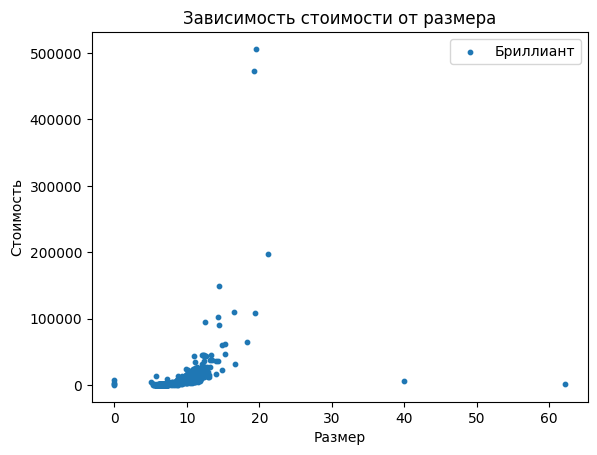

In [27]:
x = train_data['size']
y = train_data['total_sales_price']
plt.scatter(x, y, s=10)
plt.title('Зависимость стоимости от размера')
plt.legend(['Бриллиант'])
plt.xlabel('Размер')
plt.ylabel('Стоимость')
plt.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

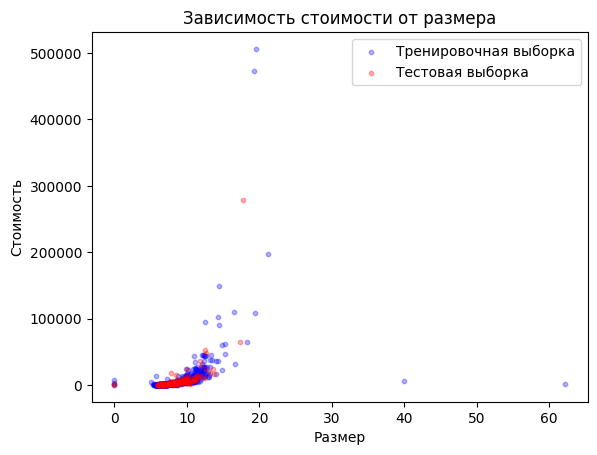

In [32]:
train_x = list(train_data['size'])
train_y = list(train_data['total_sales_price'])
plt.scatter(train_x, train_y, s=10, c='blue', alpha=0.3)
test_x = list(test_data['size'])
test_y = list(test_data['total_sales_price'])
plt.scatter(test_x, test_y, s=10, c='red', alpha=0.3)
plt.title('Зависимость стоимости от размера')
plt.legend(['Тренировочная выборка', 'Тестовая выборка'])
plt.xlabel('Размер')
plt.ylabel('Стоимость')
plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [33]:
dist = [0] * 200
nearest = [0] * 200
for i in range(200):
    dist[i] = ((test_x[i] - train_x[0]) ** 2 + (test_y[i] - train_y[0]) ** 2) ** 0.5
    for j in range(800):
        if ((test_x[i] - train_x[j]) ** 2 + (test_y[i] - train_y[j]) ** 2) ** 0.5 < dist[i]:
            dist[i] = ((test_x[i] - train_x[j]) ** 2 + (test_y[i] - train_y[j]) ** 2) ** 0.5
            nearest[i] = j

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [34]:
ans = 0
for i in range(200):
    ans += abs(test_y[i] - train_y[nearest[i]]) / test_y[i]
ans /= 200
print(ans * 100)

0.5047015498462089


**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [53]:
from sklearn.preprocessing import OneHotEncoder
attributes = diamonds[['cut', 'color']]
data = diamonds['total_sales_price']
attributes = pd.DataFrame(OneHotEncoder(sparse_output=False).fit_transform(attributes))

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [54]:
train_data, test_data, train_attributes, test_attributes = train_test_split(data, attributes, train_size=0.8, random_state=57)

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [55]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=10)
model.fit(train_attributes, train_data)

DecisionTreeRegressor(max_depth=10)

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [57]:
from sklearn.metrics import mean_squared_error
prediction = model.predict(test_attributes)
mean_squared_error(test_data, prediction)

778957955.1921707

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)